In [1]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchbearer.callbacks import LiveLossPlot

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

import torchbearer

# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(seed)

# flatten 28*28 images to a 784 vector for each image
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])

# load data
trainset = MNIST(".", train=True, download=True, transform=transform)
testset = MNIST(".", train=False, download=True, transform=transform)

# create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=True)

# define baseline model
class BaselineModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        if not self.training:
            out = F.softmax(out, dim=1)
        return out

device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [2]:
"""acclist = [0.9822999835014343, 0.9758999943733215, 0.9784999489784241, 0.9781000018119812]
accvals = [78400, 156800, 235200, 313600]

hiddenamounts = [78400*(i+1)+accvals[-1] for i in range(0,10)]

for hiddenunits in hiddenamounts:
    torch.cuda.empty_cache()
    
    print(hiddenunits)
    model = BaselineModel(784, hiddenunits, 10).to(device)
    
    # load data
    trainset = MNIST(".", train=True, download=True, transform=transform)
    testset = MNIST(".", train=False, download=True, transform=transform)
    # create data loaders
    trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
    testloader = DataLoader(testset, batch_size=128, shuffle=True)

    # define the loss function and the optimiser
    loss_function = nn.CrossEntropyLoss()
    optimiser = optim.Adam(model.parameters())

    # Run trial
    trial = torchbearer.Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy'],
                             callbacks=[LiveLossPlot()]).to(device)
    trial.with_generators(trainloader, test_generator=testloader)
    trial.run(epochs=10)
    
    results = trial.evaluate(data_key=torchbearer.TEST_DATA)
    print(results)
    accvals.append(hiddenunits)
    acclist.append(results["test_acc"])
    del trial
    del model
    del results
    torch.cuda.empty_cache()
    
    plt.plot(accvals,acclist)"""

'acclist = [0.9822999835014343, 0.9758999943733215, 0.9784999489784241, 0.9781000018119812]\naccvals = [78400, 156800, 235200, 313600]\n\nhiddenamounts = [78400*(i+1)+accvals[-1] for i in range(0,10)]\n\nfor hiddenunits in hiddenamounts:\n    torch.cuda.empty_cache()\n    \n    print(hiddenunits)\n    model = BaselineModel(784, hiddenunits, 10).to(device)\n    \n    # load data\n    trainset = MNIST(".", train=True, download=True, transform=transform)\n    testset = MNIST(".", train=False, download=True, transform=transform)\n    # create data loaders\n    trainloader = DataLoader(trainset, batch_size=128, shuffle=True)\n    testloader = DataLoader(testset, batch_size=128, shuffle=True)\n\n    # define the loss function and the optimiser\n    loss_function = nn.CrossEntropyLoss()\n    optimiser = optim.Adam(model.parameters())\n\n    # Run trial\n    trial = torchbearer.Trial(model, optimiser, loss_function, metrics=[\'loss\', \'accuracy\'],\n                             callbacks=[Liv

In [3]:
"""import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

plt.plot(accvals,acclist)
print([7840*(i+1) for i in range(0,20)])
print(acclist)
print(accvals)"""

'import matplotlib.pyplot as plt\nplt.style.use("fivethirtyeight")\n\nplt.plot(accvals,acclist)\nprint([7840*(i+1) for i in range(0,20)])\nprint(acclist)\nprint(accvals)'

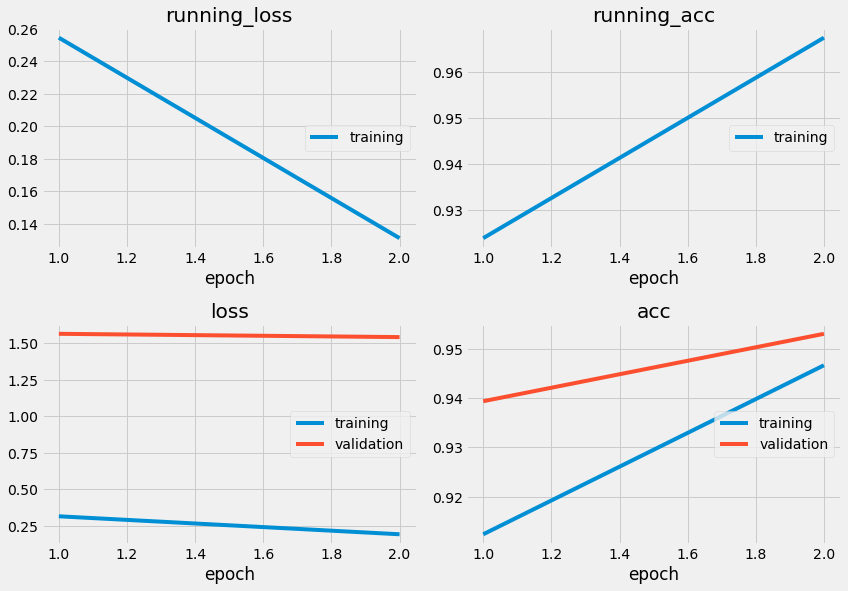

In [ ]:
torch.cuda.empty_cache()

model = BaselineModel(784, 60000, 10).to(device)

# load data
trainset = MNIST(".", train=True, download=True, transform=transform)
testset = MNIST(".", train=False, download=True, transform=transform)

# create data loaders
trainloader = DataLoader(trainset, batch_size=16, shuffle=True)
testloader = DataLoader(testset, batch_size=16, shuffle=True)

# define the loss function and the optimiser
loss_function = nn.CrossEntropyLoss()
#optimiser = optim.Adam(model.parameters())
optimiser = optim.SGD(model.parameters(),lr=0.01)

# Run trial
trial = torchbearer.Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy'],
                         callbacks=[LiveLossPlot()]).to(device)
trial.with_generators(trainloader, val_generator=testloader, test_generator=testloader)
#trial.with_generators(testloader, val_generator=trainloader, test_generator=trainloader)
trial.run(epochs=60)

#accvals.append(hiddenunits)
#acclist.append(results["test_acc"])

In [ ]:
results = trial.evaluate(data_key=torchbearer.TEST_DATA)
print(results)

In [ ]:
results = trial.to(device).evaluate(data_key=torchbearer.TEST_DATA)
print(results)

In [ ]:
model.eval().to("cpu")

# Compute the model accuracy on the test set
correct = 0
total = 0

# YOUR CODE HERE
for (images,labels) in testloader:
    predictions = model(images)
    for i in range(len(predictions)):
        prediction = torch.argmax(predictions[i])
        if prediction == labels[i]:
            correct += 1
        total += 1

print('Test Accuracy: %2.2f %%' % ((100.0 * correct) / total))